In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pandas as pd

import bz2
import _pickle

In [2]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams.update({'font.size': 18})
original_matlab_data_path = 'data/SVD-Meaningful_PCs/allFaces.mat'
pickle_data_path = 'data/SVD-Meaningful_PCs/faces.pkl.pbz2'

In [3]:
def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = _pickle.load(data)
    return data.to_numpy()

In [4]:
training_faces = decompress_pickle(pickle_data_path)
m = 168
n = 192
# person 1 has 64 pictures, person 2 has 62 pictures etc.
n_faces = [64, 62, 64, 64, 62, 64, 64, 64, 64, 64, 60, 59, 60, 63, 62, 63, 63,
           64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
           64, 64]

people = len(n_faces)
print(f"There are {people} people in total.")

There are 36 people in total.


In [5]:
total_pixels = training_faces.shape[0]
total_amount_of_pictures = training_faces.shape[1]

In [6]:
modify_x_people = 10
split_data_in_half_delimiter = np.sum(n_faces[:modify_x_people])

split_training_faces = np.split(training_faces, [split_data_in_half_delimiter], axis=1)
modify_faces = split_training_faces[0]
intact_faces = split_training_faces[1]

In [7]:
# TODO: rotate the faces array

In [8]:
training_faces_merged = np.concatenate((modify_faces, intact_faces), axis=1)

In [9]:
avg_face = np.mean(training_faces_merged, axis=1)

X = training_faces_merged - np.tile(avg_face, (total_amount_of_pictures, 1)).T
u, sigma, vT = np.linalg.svd(X, full_matrices=False)

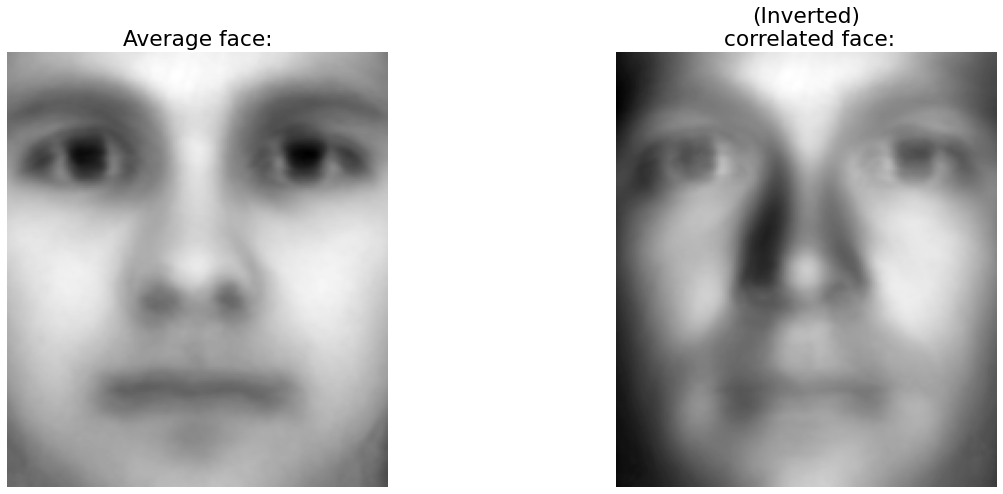

In [10]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(121, title="Average face:")
np_avg_face = np.reshape(avg_face, (m, n)).T
img_avg = ax1.imshow(np_avg_face)
img_avg.set_cmap('gray')
plt.axis('off')


ax3 = fig1.add_subplot(122, title="(Inverted)\n correlated face:")
correlated_face = np.reshape(u[:, 0], (m, n)).T
img_u2 = ax3.imshow(correlated_face)
img_u2.set_cmap('gray_r')
plt.axis('off')


plt.show()